## Loan Approved or Denied - Decision Tree

### Dataset Description

The dataset is from the U.S. Small Business Administration (SBA)
The U.S. SBA was founded in 1953 on the principle of promoting and assisting small enterprises in the U.S. credit market 
(SBA Overview and History, US Small Business Administration (2015)). Small businesses have been a primary source of job creation in the United States; therefore, fostering small business formation and growth has social benefits by creating job opportunities and reducing unemployment.
There have been many success stories of start-ups receiving SBA loan guarantees such as FedEx and Apple Computer. 
However, there have also been stories of small businesses and/or start-ups that have defaulted on their SBA-guaranteed loans.

More info on the original dataset: https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied

### Data Preparation

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 1500)

import warnings
warnings.filterwarnings('ignore')

# Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [ ]:
"""
Purpose: Analyze input Pandas DataFrame and return stats per column
Details: The function calculates levels for categorical variables and allows to analyze summarized information
"""

def describe_more(df,normalize_ind=False, weight_column=None, skip_columns=[], dropna=True):
    var = [] ; l = [] ; t = []; unq =[]; min_l = []; max_l = [];
    assert isinstance(skip_columns, list),
    if weight_column is not None:
        if weight_column not in list(df.columns):
            raise AssertionError
      
    for x in df:
        if x in skip_columns:
            pass
        else:
            var.append( x )
            uniq_counts = len(pd.value_counts(df[x],dropna=dropna))
            uniq_counts = len(pd.value_counts(df[x], dropna=dropna)[pd.value_counts(df[x],dropna=dropna)>0])
            l.append(uniq_counts)
            t.append( df[ x ].dtypes )
            min_l.append(df[x].apply(str).str.len().min())
            max_l.append(df[x].apply(str).str.len().max())
            if weight_column is not None and x not in skip_columns:
                df2 = df.groupby(x).agg({weight_column: 'sum'}).sort_values(weight_column, ascending=False)
                df2['authtrans_vts_cnt']=((df2[weight_column])/df2[weight_column].sum()).round(2)
                unq.append(df2.head(n=100).to_dict()[weight_column])
            else:
                df_cat_d = df[x].value_counts(normalize=normalize_ind,dropna=dropna).round(decimals=2)
                df_cat_d = df_cat_d[df_cat_d>0]
                #unq.append(df[x].value_counts().iloc[0:100].to_dict())
                unq.append(df_cat_d.iloc[0:100].to_dict())
            
    levels = pd.DataFrame( { 'A_Variable' : var , 'Levels' : l , 'Datatype' : t ,
                             'Min Length' : min_l,
                             'Max Length': max_l,
                             'Level_Values' : unq} )
    #levels.sort_values( by = 'Levels' , inplace = True )
    return levels

In [ ]:
X_train = pd.read_csv('/Users/thienla/Desktop/Portfolio/Machine Learning/Module 3/Lab 3/SBA_loans_train.csv')
X_test  = pd.read_csv('/Users/thienla/Desktop/Portfolio/Machine Learning/Module 3/Lab 3/SBA_loans_test.csv')
orig_columns = list(X_train.columns)

In [5]:
print(orig_columns)

['City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc', 'DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv', 'Defaulted']


In [6]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (337186, 20)
Test shape: (112396, 20)


#### Review Dataset

In [ ]:
# pd.set_option('display.width', 1000)
# pd.set_option('max_colwidth',200)
desc_df = describe_more(X_train)
desc_df

A_Variable  Levels Datatype  Min Length  Max Length  \
0                City   22069   object           1          30   
1               State      51   object           2           3   
2                 Zip   26044    int64           1           5   
3                Bank    4833   object           3          30   
4           BankState      55   object           2           3   
5               NAICS    1279    int64           1           6   
6                Term     372    int64           1           3   
7               NoEmp     433    int64           1           4   
8            NewExist       3  float64           3           3   
9           CreateJob     180    int64           1           4   
10        RetainedJob     274    int64           1           4   
11      FranchiseCode    1976    int64           1           5   
12         UrbanRural       3    int64           1           1   
13          RevLineCr      13   object           1           3   
14             LowDoc       7   object           1           3   
15  DisbursementGross   58004  float64           3          10   
16       BalanceGross       5  float64           3           8   
17             GrAppv   12432  float64           5           9   
18           SBA_Appv   21440  float64           5           9   
19          Defaulted       2    int64           1           1   

                                         Level_Values  
0   {'LOS ANGELES': 4278, 'HOUSTON': 3801, 'NEW YO...  
1   {'CA': 49031, 'TX': 26500, 'NY': 21508, 'FL': ...  
2   {90015: 344, 10001: 328, 93401: 308, 33166: 26...  
3   {'BANK OF AMERICA NATL ASSOC': 32382, 'WELLS F...  
4   {'CA': 44497, 'NC': 29717, 'IL': 24674, 'OH': ...  
5   {0: 75763, 722110: 10456, 722211: 7319, 811111...  
6   {84: 86087, 60: 33770, 240: 32245, 120: 29056,...  
7   {1: 57553, 2: 51865, 3: 34228, 4: 27633, 5: 22...  
8                 {1.0: 241894, 2.0: 94857, 0.0: 389}  
9   {0: 236015, 1: 23537, 2: 21779, 3: 10849, 4: 7...  
10  {0: 165060, 1: 33090, 2: 28888, 3: 18798, 4: 1...  
11  {1: 239448, 0: 78300, 78760: 1238, 68020: 713,...  
12                   {1: 176392, 0: 121188, 2: 39606}  
13  {'N': 157494, '0': 96923, 'Y': 75248, 'T': 579...  
14  {'N': 293633, 'Y': 41283, '0': 581, 'C': 284, ...  
15  {50000.0: 16168, 100000.0: 13764, 25000.0: 103...  
16  {0.0: 337182, 827875.0: 1, 37100.0: 1, 996262....  
17  {50000.0: 25800, 25000.0: 19276, 100000.0: 191...  
18  {25000.0: 18429, 12500.0: 15052, 5000.0: 11547...  
19                              {0: 278114, 1: 59072}

In [8]:
X_train.describe()

Zip          NAICS           Term          NoEmp  \
count  337186.000000  337186.000000  337186.000000  337186.000000   
mean    53839.723945  398565.095974     110.888984      11.310229   
std     31173.277974  263305.463724      78.951681      68.753263   
min         0.000000       0.000000       0.000000       0.000000   
25%     27604.250000  235210.000000      60.000000       2.000000   
50%     55414.000000  445310.000000      84.000000       4.000000   
75%     83706.000000  561730.000000     120.000000      10.000000   
max     99999.000000  928120.000000     505.000000    9999.000000   

            NewExist      CreateJob    RetainedJob  FranchiseCode  \
count  337140.000000  337186.000000  337186.000000  337186.000000   
mean        1.280204       8.590790      10.977176    2754.662685   
std         0.451661     239.591219     240.184246   12749.672453   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       0.000000       1.000000   
50%         1.000000       0.000000       1.000000       1.000000   
75%         2.000000       1.000000       4.000000       1.000000   
max         2.000000    8800.000000    9500.000000   99999.000000   

          UrbanRural  DisbursementGross   BalanceGross        GrAppv  \
count  337186.000000       3.371860e+05  337186.000000  3.371860e+05   
mean        0.758050       2.021301e+05       5.643016  1.935411e+05   
std         0.646786       2.892966e+05    2232.801967  2.847135e+05   
min         0.000000       0.000000e+00       0.000000  2.000000e+02   
25%         0.000000       4.201250e+04       0.000000  3.500000e+04   
50%         1.000000       1.000000e+05       0.000000  9.000000e+04   
75%         1.000000       2.400000e+05       0.000000  2.270000e+05   
max         2.000000       1.100000e+07  996262.000000  5.000000e+06   

           SBA_Appv      Defaulted  
count  3.371860e+05  337186.000000  
mean   1.501295e+05       0.175191  
std    2.293072e+05       0.380131  
min    1.000000e+02       0.000000  
25%    2.125000e+04       0.000000  
50%    6.210000e+04       0.000000  
75%    1.750000e+05       0.000000  
max    4.869000e+06       1.000000

In [9]:
X_train.head()

City State    Zip                         Bank BankState   NAICS  \
0  Huntsville    AL  35811    BUSINESS LOAN CENTER, LLC        FL  621310   
1  SCOTTSDALE    AZ  85254  WELLS FARGO BANK NATL ASSOC        CA       0   
2      BANGOR    ME   4401          BANGOR SAVINGS BANK        ME  323110   
3    AVONDALE    AZ  85323     NATIONAL BANK OF ARIZONA        AZ  722110   
4     HAMMOND    LA  70403     BIZCAPITAL BIDCO II, LLC        LA       0   

   Term  NoEmp  NewExist  CreateJob  RetainedJob  FranchiseCode  UrbanRural  \
0    73      1       2.0          2            1              0           1   
1    84      3       2.0          0            0              0           0   
2    84      9       1.0          0            0              1           1   
3    27     20       1.0          0           20          10625           2   
4    60      1       1.0          0            0              1           1   

  RevLineCr LowDoc  DisbursementGross  BalanceGross    GrAppv  SBA_Appv  \
0         N      N            25000.0           0.0   25000.0   21250.0   
1         N      N            52000.0           0.0   52000.0   46800.0   
2         0      Y           150000.0           0.0  150000.0  127500.0   
3         Y      N           186959.0           0.0  100000.0   50000.0   
4         0      Y            50000.0           0.0   50000.0   40000.0   

   Defaulted  
0          1  
1          1  
2          0  
3          1  
4          0

Explore levels and counts in the RevLineCr column. Some column values needs to be "cleaned"

In [10]:
desc_df.iloc[13]["Level_Values"]

{'N': 157494,
 '0': 96923,
 'Y': 75248,
 'T': 5797,
 'R': 7,
 '1': 6,
 '`': 2,
 '2': 1,
 ',': 1,
 '7': 1,
 'A': 1,
 '-': 1,
 'Q': 1}

Replace missing values for all columns for both X_train and X_test

Replace Na's with zero for numerical variables and with "Missing" for categorical

In [11]:
values_to_fill = {}
for col in X_train.drop(columns=['Defaulted']).columns:
    if X_train[col].dtype == 'object':
        values_to_fill[col] = "Missing"
    else:
        values_to_fill[col] = 0

X_train.fillna(value=values_to_fill,inplace=True)
X_test.fillna(value=values_to_fill, inplace=True)

#### Encode Categorical Variables

I'm going to use Decision Tree approach, so I will not use One-Hot-Encoding. Instead, I will use  Label Encoding, Target Encoding and Weight of Evidence Encoding

In [12]:
len_data = len(X_train)
for col in X_train.drop(columns=['Defaulted']).columns:
  if X_train[col].dtype == 'object':
    print("Column ",col," has ",X_train[col].nunique()," values")

Column  City  has  22070  values
Column  State  has  52  values
Column  Bank  has  4834  values
Column  BankState  has  56  values
Column  RevLineCr  has  14  values
Column  LowDoc  has  8  values


In [ ]:
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from copy import deepcopy

# Save original columns need to be droped or not used
orig_categorical_columns = []
cat_encoders = {}
le_columns = []

# Label
for col in X_train.drop(columns=['Defaulted']).columns:
  if X_train[col].dtype == 'object':
    print("Encode column:...", col)
    enc = LabelEncoder()
    enc.fit(list(X_train[col])+list(X_test[col]))
    X_train[col+"_le"] = enc.transform(X_train[[col]])
    X_test[col+"_le"] = enc.transform(X_test[[col]])
    cat_encoders[(col,"le")] = [deepcopy(enc),"le"]
    orig_categorical_columns.append(col)
    le_columns.append(col+"_le")

Encode column:... City
Encode column:... State
Encode column:... Bank
Encode column:... BankState
Encode column:... RevLineCr
Encode column:... LowDoc


In [14]:
orig_categorical_columns

['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc']

In [15]:
le_columns

['City_le', 'State_le', 'Bank_le', 'BankState_le', 'RevLineCr_le', 'LowDoc_le']

In [ ]:
label_col = 'Defaulted'

# Target
target_encoder = ce.TargetEncoder (min_samples_leaf=20, smoothing=10)
target_encoder.fit(X_train[orig_categorical_columns],X_train[label_col])
X_train_target_enc = target_encoder.transform(X_train[orig_categorical_columns])
X_test_target_enc = target_encoder.transform(X_test[orig_categorical_columns])

# Weight of Evidence
woe_encoder = ce.WOEEncoder(cols=orig_categorical_columns)
woe_encoder.fit(X_train[orig_categorical_columns],X_train[label_col])
X_train_woe_enc = woe_encoder.transform(X_train[orig_categorical_columns])
X_test_woe_enc = woe_encoder.transform(X_test[orig_categorical_columns])


te_columns = []
woe_columns = []
for col in orig_categorical_columns:
    X_train[col+"_te"] = X_train_target_enc[col]
    X_test[col+"_te"] = X_test_target_enc[col]
    te_columns.append(col+"_te")
    
    X_train[col+"_woe"] = X_train_woe_enc[col]
    X_test[col+"_woe"] = X_test_woe_enc[col]
    woe_columns.append(col+"_woe")

cat_encoders[("orig_categorical_columns","te")] = [deepcopy(target_encoder),"te"]
cat_encoders[("orig_categorical_columns","woe")] = [deepcopy(woe_encoder),"woe"]

In [17]:
cat_encoders['orig_categorical_columns','te']

[TargetEncoder(cols=['City', 'State', 'Bank', 'BankState', 'RevLineCr',
                     'LowDoc']),
 'te']

### Train Decision Tree Model

Metrics are F1 and Confusion Matrix

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

non_categorical_columns = [col for col in orig_columns if col not in orig_categorical_columns]
non_categorical_columns.remove(label_col)

max_depth = 10

# Train Decision Tree with Lable Encoding
dtc = DecisionTreeClassifier(random_state=0, 
                             criterion="entropy",
                             max_depth=max_depth)

dtc.fit(X_train[non_categorical_columns+le_columns], X_train[label_col])

y_tst_pred = dtc.predict(X_test[non_categorical_columns+le_columns])
y_tr_pred = dtc.predict(X_train[non_categorical_columns+le_columns])
print("Trained Decision Tree with Lable Encoding",)
f1 = f1_score(X_test[label_col], y_tst_pred, average='weighted')
print("Test F1 score:...",f1)
print("====Confusion Matrix===")
print(confusion_matrix(X_test[label_col], y_tst_pred))
print("\n")

Trained Decision Tree with LE Encoding
Test F1 score:... 0.927703985243013
====Confusion Matrix===
[[88836  3853]
 [ 4241 15466]]


Trained Decision Tree with TE Encoding
Test F1 score:... 0.9280157378017886
====Confusion Matrix===
[[89095  3594]
 [ 4428 15279]]


Trained Decision Tree with WOE Encoding
Test F1 score:... 0.9247565682735117
====Confusion Matrix===
[[89584  3105]
 [ 5169 14538]]




In [ ]:
# Train Decision Tree with Target Encoding
dtc = DecisionTreeClassifier(random_state=0, 
                             criterion="entropy",
                             max_depth=max_depth)

dtc.fit(X_train[non_categorical_columns+te_columns], X_train[label_col])

y_tst_pred = dtc.predict(X_test[non_categorical_columns+te_columns])
y_tr_pred = dtc.predict(X_train[non_categorical_columns+te_columns])
print("Trained Decision Tree with TE Encoding",)
f1 = f1_score(X_test[label_col], y_tst_pred, average='weighted')
print("Test F1 score:...",f1)
print("====Confusion Matrix===")
print(confusion_matrix(X_test[label_col], y_tst_pred))
print("\n")

In [ ]:
# Train Decision Tree with Weight of Evidence Encoding
dtc = DecisionTreeClassifier(random_state=0, 
                             criterion="entropy",
                             max_depth=max_depth)

dtc.fit(X_train[non_categorical_columns+woe_columns], X_train[label_col])

y_tst_pred = dtc.predict(X_test[non_categorical_columns+woe_columns])
y_tr_pred = dtc.predict(X_train[non_categorical_columns+woe_columns])
print("Trained Decision Tree with WOE Encoding",)
f1 = f1_score(X_test[label_col], y_tst_pred, average='weighted')
print("Test F1 score:...",f1)
print("====Confusion Matrix===")
print(confusion_matrix(X_test[label_col], y_tst_pred))
print("\n")

### Hyper-Parameters Tuning

In [19]:
X_train.head()

City State    Zip                         Bank BankState   NAICS  \
0  Huntsville    AL  35811    BUSINESS LOAN CENTER, LLC        FL  621310   
1  SCOTTSDALE    AZ  85254  WELLS FARGO BANK NATL ASSOC        CA       0   
2      BANGOR    ME   4401          BANGOR SAVINGS BANK        ME  323110   
3    AVONDALE    AZ  85323     NATIONAL BANK OF ARIZONA        AZ  722110   
4     HAMMOND    LA  70403     BIZCAPITAL BIDCO II, LLC        LA       0   

   Term  NoEmp  NewExist  CreateJob  RetainedJob  FranchiseCode  UrbanRural  \
0    73      1       2.0          2            1              0           1   
1    84      3       2.0          0            0              0           0   
2    84      9       1.0          0            0              1           1   
3    27     20       1.0          0           20          10625           2   
4    60      1       1.0          0            0              1           1   

  RevLineCr LowDoc  DisbursementGross  BalanceGross    GrAppv  SBA_Appv  \
0         N      N            25000.0           0.0   25000.0   21250.0   
1         N      N            52000.0           0.0   52000.0   46800.0   
2         0      Y           150000.0           0.0  150000.0  127500.0   
3         Y      N           186959.0           0.0  100000.0   50000.0   
4         0      Y            50000.0           0.0   50000.0   40000.0   

   Defaulted  City_le  State_le  Bank_le  BankState_le  RevLineCr_le  \
0          1    10027         1      803            11             9   
1          1    19482         3     4997             5             9   
2          0     1058        21      381            23             2   
3          1      740         3     3292             4            13   
4          0     8869        18      708            20             2   

   LowDoc_le   City_te  City_woe  State_te  State_woe   Bank_te  Bank_woe  \
0          4  0.283212  1.107415  0.167744  -0.050917  0.308181  0.741374   
1          4  0.191919  0.118312  0.200634   0.167471  0.138341 -0.279641   
2          7  0.125985 -0.336038  0.096586  -0.682359  0.062502 -1.049319   
3          4  0.351182  1.063740  0.200634   0.167471  0.059406 -1.162305   
4          7  0.275805  0.622485  0.179574   0.031247  0.362410  1.072323   

   BankState_te  BankState_woe  RevLineCr_te  RevLineCr_woe  LowDoc_te  \
0      0.158105      -0.122172      0.146342      -0.214300   0.186457   
1      0.221678       0.293405      0.146342      -0.214300   0.186457   
2      0.076696      -0.930088      0.149252      -0.191171   0.090740   
3      0.068197      -1.056343      0.253136       0.467327   0.186457   
4      0.101741      -0.624053      0.149252      -0.191171   0.090740   

   LowDoc_woe  
0    0.076065  
1    0.076065  
2   -0.755151  
3    0.076065  
4   -0.755151

Split Train dataset using 80/20 split to Train/Validation

Use new Train dataset to fit the model

Use Validation dataset to evaluate and identify the best model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split X_train to Train and Validation
X = X_train.copy()
Y = X_train[label_col]
X_tr, X_val, Y_tr, Y_val = train_test_split(X, Y, test_size=0.2, random_state=0)

X_tr = X_tr[non_categorical_columns+te_columns]
X_val = X_val[non_categorical_columns+te_columns]
X_tst = X_test[non_categorical_columns+te_columns]
Y_tst = X_test[label_col]

Metrics are
- Set of Hyper Parameters used to train the model
- F1 and confusion matrix on Validation dataset 
- F1 and confusion matrix on Test dataset

In [24]:
best_f1 = 0
best_params = {}
best_model = None

for max_depth in [5,10,12,15,20]:
    for min_samples_split in [25, 50, 75]:
        for min_impurity_decrease in [0.0, 0.02, 0.05]:
            dtc = DecisionTreeClassifier(random_state=0, 
                                         criterion="entropy",
                                         max_depth=max_depth,
                                         min_samples_split=min_samples_split,
                                         min_impurity_decrease=min_impurity_decrease)

            dtc.fit(X_tr, Y_tr)
            y_val_pred = dtc.predict(X_val)
            # print("Trained Decision Tree with (max_dept, min_samples_split, min_impurity_decrease):(", \
            #                     max_depth, min_samples_split,min_impurity_decrease,")")
            f1 = f1_score(Y_val, y_val_pred, average='weighted')
            if f1>best_f1:
                best_f1 = f1
                best_params["max_depth"] = max_depth
                best_params["min_samples_split"] = min_samples_split
                best_params["min_impurity_decrease"] = min_impurity_decrease
            # print("F1 for Validation Dataset:", f1)

Trained Decision Tree with (max_dept, min_samples_split, min_impurity_decrease):( 5 25 0.0 )
F1 for Validation Dataset: 0.8957710102897897
Trained Decision Tree with (max_dept, min_samples_split, min_impurity_decrease):( 5 25 0.02 )
F1 for Validation Dataset: 0.8532430145458133
Trained Decision Tree with (max_dept, min_samples_split, min_impurity_decrease):( 5 25 0.05 )
F1 for Validation Dataset: 0.8532430145458133
Trained Decision Tree with (max_dept, min_samples_split, min_impurity_decrease):( 5 50 0.0 )
F1 for Validation Dataset: 0.8957710102897897
Trained Decision Tree with (max_dept, min_samples_split, min_impurity_decrease):( 5 50 0.02 )
F1 for Validation Dataset: 0.8532430145458133
Trained Decision Tree with (max_dept, min_samples_split, min_impurity_decrease):( 5 50 0.05 )
F1 for Validation Dataset: 0.8532430145458133
Trained Decision Tree with (max_dept, min_samples_split, min_impurity_decrease):( 5 75 0.0 )
F1 for Validation Dataset: 0.8957710102897897
Trained Decision Tree w

In [25]:
# Best parameters
print("Best params:", best_params)

Best params: {'max_depth': 15, 'min_samples_split': 50, 'min_impurity_decrease': 0.0}


### Train Decision Tree Model Best Parameters

In [26]:
best_model = DecisionTreeClassifier(random_state=0, 
                                     criterion="entropy",
                                     max_depth=best_params["max_depth"],
                                     min_samples_split=best_params["min_samples_split"],
                                     min_impurity_decrease=best_params["min_impurity_decrease"])
best_model.fit(X_tr, Y_tr)

y_val_pred = best_model.predict(X_val)
f1_val = f1_score(Y_val, y_val_pred, average='weighted')

In [27]:
y_tst_pred = best_model.predict(X_tst)
y_val_pred = best_model.predict(X_val)

f1_val = f1_score(Y_val, y_val_pred, average='weighted')
print("F1 for Validation:", f1_val)
f1_tst = f1_score(Y_tst, y_tst_pred, average='weighted')
print("F1 for Test:", f1_tst)
print("Test set confusion matrix:")
print(confusion_matrix(Y_tst, y_tst_pred))

F1 for Validation: 0.9366446218653249
F1 for Test: 0.9337267853087968
Test set confusion matrix:
[[89583  3106]
 [ 4255 15452]]


#### Re-train Decision Tree Model

Train model with best parameters on full train dataset

Evaluate model performance on test dataset.

In [ ]:
X_tr = X[non_categorical_columns+te_columns]
Y_tr = Y
best_model_full = DecisionTreeClassifier(random_state=0, 
                                     criterion="entropy",
                                     max_depth=best_params["max_depth"],
                                     min_samples_split=best_params["min_samples_split"],
                                     min_impurity_decrease=best_params["min_impurity_decrease"])
best_model_full.fit(X_tr, Y_tr)

y_tst_pred = best_model_full.predict(X_tst)

f1_tst = f1_score(Y_tst, y_tst_pred, average='weighted')
print("F1 for Test:", f1_tst)
print("Test set confusion matrix:")
print(confusion_matrix(Y_tst, y_tst_pred))

Best params: {'max_depth': 15, 'min_samples_split': 50, 'min_impurity_decrease': 0.0}
F1 for Test: 0.9346018040410864
Test set confusion matrix:
[[89665  3024]
 [ 4235 15472]]


### Feature Importance

Produce visualization of the best model feature importance's

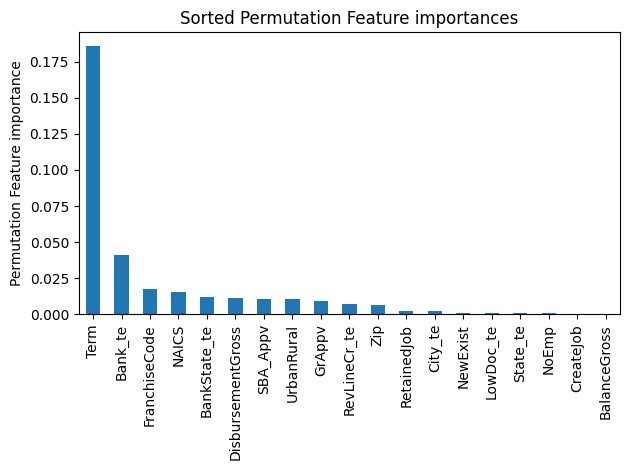

In [29]:
# Calculate feature importance using permutation method
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

%matplotlib inline
result = permutation_importance(
    best_model_full, X_tst, Y_tst, n_repeats=100, random_state=42, n_jobs=4
)

feature_names = X_tst.columns
tree_importances = pd.Series(result.importances_mean, index=feature_names)
tree_importances = tree_importances.sort_values(ascending=False)

fig, ax = plt.subplots()
tree_importances.plot.bar(ax=ax)
ax.set_title("Sorted Permutation Feature importances")
ax.set_ylabel("Permutation Feature importance")
fig.tight_layout()